# 2 Exploratory Data Analysis<a id='1_Exploratory_Data_Analysis'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_Exploratory_Data_Analsis)
    * [2.1 Contents](#2.1_Contents)
    * [2.2 Introduction](#2.2_Introduction)
    * [2.3 Imports](#2.3_Imports)
    * [2.4 Load the Raw Data](#2.4_Load_the_raw_data)
    * [2.5 Explore the Raw Data](#2.5_Explore_the_raw_data)
        * [2.5.1 Categorical Features with Target](#2.5.1_Categorical_Features_with_target)
        * [2.5.2 Ordinal Features](#2.5.2_Ordinal_Features)
            * [2.5.2.1 Visualizing Ordinal Features](#2.5.2.1_Visualizing_Ordinal_Features)
        * [2.5.3 Continuous Features](#2.5.3_Continuous_Features)
    * [2.6 Export the Cleaned Data](#2.6_Export_the_cleaned_data)

## 2.2 Introduction<a id='2.2_Introduction'></a>

In the previous notebook, we completed the data wrangling portion of this study. We divided the predictors into three sets of groups:

    - Categorical Variables
    - Ordinal Variables
    - Continuous Variables
    
The goal of this notebook is to understand the relationship between the target `satisfaction` and the predictor variables

## 2.3 Imports<a id='2.3_Imports'></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import os

## 2.4 Load the Raw data<a id='2.4_Load_the_raw_data'></a>

In [2]:
raw_data_clean = pd.read_csv('../data/interim/raw_data_clean.csv')

In [3]:
#check the first few obs
raw_data_clean.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [4]:
#check the info
raw_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

## 2.5 Explore the Raw data<a id='2.5_Explore_the_raw_data'></a>

In [5]:
#Preview the data
pd.set_option('display.max_columns', None)
with pd.option_context('display.max_rows',10):
    display(raw_data_clean)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


### 2.5.1 Categorical Features with target<a id='2.5.1_Categorical_Features_with_target'></a>

Text(0.5, 1.0, 'Class by Satisfaction')

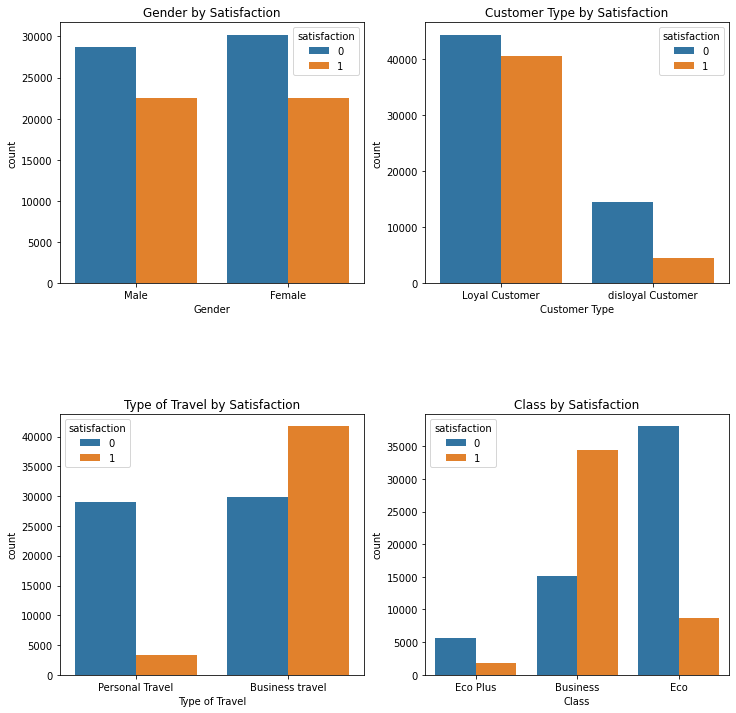

In [6]:
#Plot Categorical Variables by Satisfaction
%matplotlib inline
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5);
sns.countplot(x = 'Gender', data = raw_data_clean, hue = 'satisfaction', ax= ax[0][0])
ax[0][0].set_title('Gender by Satisfaction')
sns.countplot(x = 'Customer Type', data = raw_data_clean, hue = 'satisfaction', ax= ax[0][1])
ax[0][1].set_title('Customer Type by Satisfaction')
sns.countplot(x = 'Type of Travel', data = raw_data_clean, hue = 'satisfaction', ax= ax[1][0])
ax[1][0].set_title('Type of Travel by Satisfaction')
sns.countplot(x = 'Class', data = raw_data_clean, hue = 'satisfaction', ax= ax[1][1])
ax[1][1].set_title('Class by Satisfaction')


### 2.5.2 Ordinal Features<a id='2.5.2_Ordinal_Features'></a>

In [7]:
ordinal_cols = raw_data_clean.loc[:, 'Inflight wifi service': 'Cleanliness'].columns
raw_data_clean[ordinal_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0
On-board service,103904.0,3.382363,1.288354,0.0,2.0,4.0,4.0,5.0
Leg room service,103904.0,3.351055,1.315605,0.0,2.0,4.0,4.0,5.0


#### 2.5.2.1 Visualizing Ordinal Features<a id='2.5.2.1_Visualizing_Ordinal_Features'></a>

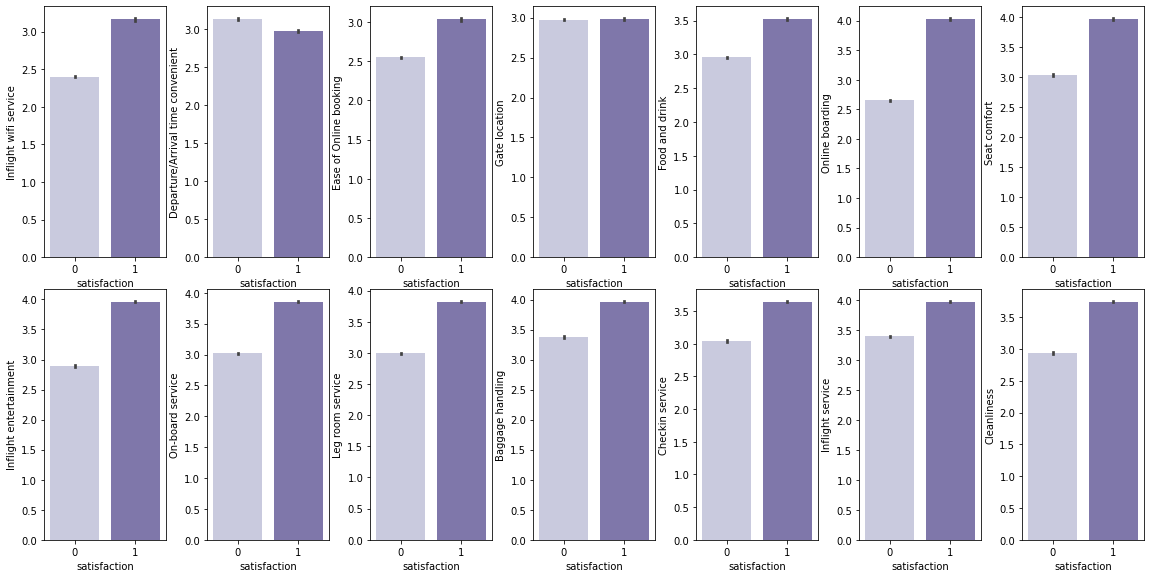

In [8]:
%matplotlib inline
fig, ax = plt.subplots(2, 7, figsize=(16, 8))
fig.tight_layout()
k = 0
for i in range(2):
    for j in range(7):
        sns.barplot(x = 'satisfaction', y = ordinal_cols[k], data = raw_data_clean, ax = ax[i][j], palette= 'Purples')
        k += 1


Analysing the results 

There are some interesting findings here -- Most of the predictor variables seem to have a positive impact with increase in the survey response scores. `Gate location` does not seem to have any positive relation with satisfaction. `Departure/Arrival time convenient` is negatively correlated with satisfaction. That doesn't make much sense and it would seem to be random chance that there is a skew towards the negative satisfaction class. 

We should also be cognizant of the fact that some of these variables will be highly correlated with each other. So we should run some correlations to ensure that multi-collinearity is not an issue.

<AxesSubplot:>

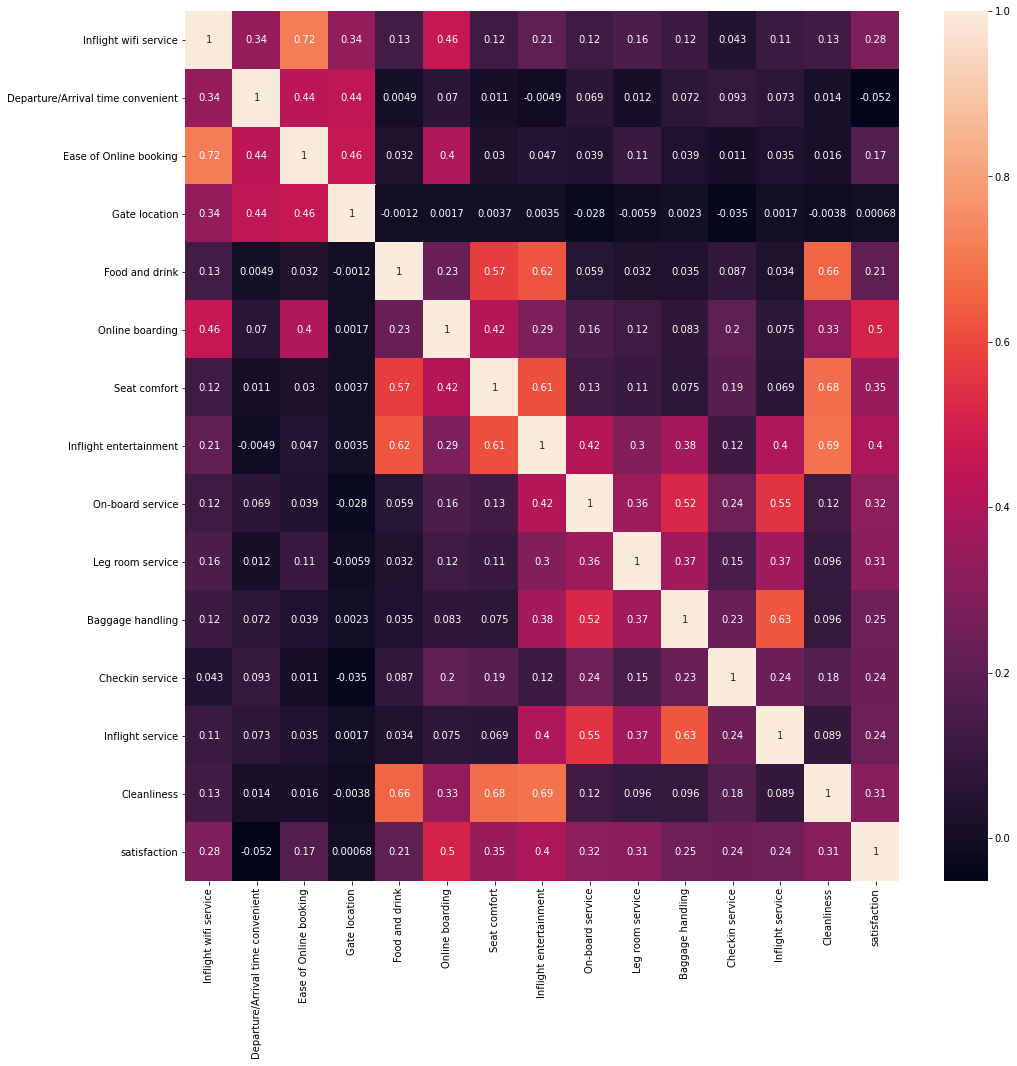

In [63]:
fig, ax = plt.subplots(figsize=(16,16))
target_ordinal_cols = list(ordinal_cols)
target_ordinal_cols.append('satisfaction')
#print(target_ordinal_cols)
#print(type(list(ordinal_cols)))
sns.heatmap(raw_data_clean[target_ordinal_cols].corr(), annot = True)

__Analysis of Correlations / Heatmap:__

As you can see from the correlations, `Gate location` and `Departure/Arrival time convenient` have no correlation with customer satisfaction. 

In [82]:
#Scale the ordinal columns
ordinal_cols_df_scale = pd.DataFrame(scale(raw_data_clean[ordinal_cols]), columns = ordinal_cols)
ordinal_cols_df_scale.drop(columns = ['Gate location', 'Departure/Arrival time convenient'], axis = 1, inplace = True)

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = ordinal_cols_df_scale.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(ordinal_cols_df_scale.values, i) 
                          for i in range(len(ordinal_cols_df_scale.columns))] 
  
display(vif_data)

,feature,VIF
0,Inflight wifi service,2.313392
1,Ease of Online booking,2.171816
2,Food and drink,2.152185
3,Online boarding,1.631701
4,Seat comfort,2.322364
5,Inflight entertainment,3.725865
6,On-board service,1.741285
7,Leg room service,1.278082
8,Baggage handling,1.877957
9,Checkin service,1.204164


__Analysis of VIFs__

Typically VIFs greater > 2 indicate high multi-collinearity. `Inflight entertainment`, `Ease of Online booking` and `Cleanliness` have VIFs greater than 2, so we should get rid of these features and re-check the VIFs.

In [83]:
ordinal_cols_df_scale.drop(columns = ['Inflight entertainment', 'Ease of Online booking', 'Cleanliness'], axis = 1, inplace = True)

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = ordinal_cols_df_scale.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(ordinal_cols_df_scale.values, i) 
                          for i in range(len(ordinal_cols_df_scale.columns))] 
  
display(vif_data)

,feature,VIF
0,Inflight wifi service,1.318327
1,Food and drink,1.509911
2,Online boarding,1.568527
3,Seat comfort,1.772236
4,On-board service,1.620406
5,Leg room service,1.252229
6,Baggage handling,1.831436
7,Checkin service,1.142938
8,Inflight service,1.912031


__As you can see, by eliminating the 3 features, the VIFs have now reduced to <= 2, indicating that there is less multi-collinearity between the variables__